# Individual Performance Analysis and Correlation with Profit Sharing

## Introduction

This document presents a detailed analysis of individual performance metrics and their correlation with profit-sharing practices in the barbershop business context. By focusing on the average daily transaction amounts for each barber and examining the relationship between profit sharing (Bagi Hasil) and service frequency (Qty), the analysis aims to provide actionable insights for performance optimization and equitable revenue allocation.

The importance of this analysis lies in understanding how individual performance drives revenue and how profit-sharing models influence service dynamics. These insights are critical for aligning financial incentives with operational efficiency, thereby fostering a more sustainable and collaborative business environment.

## Objectives

The primary objectives of this analysis are:

1. Identification of individual performance based on the average number of customers worked / day and the average nominal transaction obtained. The number of customers is determined from the Item Name service with the category "Haircut Services."
2. Determine which Outlet has the Average Individual Barberman performing well.
3. Analyze the difference in profit sharing & Barberman Commission and its effect:
   - Identify the distribution of profit sharing and commission that each Barberman/outlet gets.
   - Determine if there is a relationship between the amount of profit sharing or high commission to the yndividual barberman performing.

Notes:

- Each Barberman has a different Profit Sharing and commission amount due to the influence of Grade.
- Barberman has income from profit sharing and commission.
- Profit Sharing and Commission schemes depend on the Item Name.

## Scope

This analysis focuses on:

- Daily transaction data segmented by individual barbers.
- Profit-sharing amounts (Bagi Hasil) and their relationship to service frequency.
- Key performance indicators, including average transaction value and service count.
- Identifying high-performing outlets based on Barberman metrics.

Assumptions:

- Data provided is complete and accurately reflects daily operations.
- External factors such as customer demographics or promotional activities are outside the scope of this analysis.

## Methodology

The following steps will be employed in this analysis:

1. SQL can be used here for efficient data aggregation directly from the database. Alternatively, Python can handle this if the data is already loaded into memory.
2. This is a Python-centric task as statistical libraries like scipy or statsmodels are well-suited for performing correlation analyses.
3. Python is ideal for this step using libraries like matplotlib or seaborn to create detailed visualizations.
4. Insight Development: Derive actionable recommendations based on the results.

## Expected Outcomes

The expected outcomes of this analysis include:

- A comprehensive view of individual barber performance in terms of transaction values and customer count.
- Quantitative insights into the impact of profit-sharing models and commission structures on barber performance.
- Identification of outlets with high-performing barbers.
- Recommendations for enhancing performance and optimizing profit-sharing mechanisms to align with organizational goals.

In [55]:
import pandas as pd
import numpy as np
from pandasql import sqldf

#load dataset
data = pd.read_csv("/kaggle/input/salesbk/SALESBK.csv")
#define lambda to run sql query
sql = lambda q: sqldf(q, globals())
#data preview
data.head()

,No,Outlet,OrderNo,OrderDate,OrderTime,ServeBy,ItemGroup,ItemName,Qty,DiscountAmount,Amount,Notes,PaymentType,BagiHasil_Normal_Percent,BagiHasil_Normal_Amount,BagiHasil_Lembur_Percent,BagiHasil_Lembur_Amount,Komisi
0,1,BK01 - ATMI,D3E6240825 00007390,2024-08-25,11:57:30,Budi Agus Purnomo,Jasa,001 Haircut Regular Non Member,1,0,65000,NaN,Barberking Pay,32.5,21125,0.0,0,0
1,2,BK01 - ATMI,D3E6240825 00007390,2024-08-25,11:57:30,Budi Agus Purnomo,Jasa,003 Vitamin,1,0,3000,NaN,Barberking Pay,32.5,975,0.0,0,475
2,3,BK01 - ATMI,D3E6240825 00007390,2024-08-25,11:57:30,Budi Agus Purnomo,Jasa,004 Silet Razor,1,0,5000,NaN,Barberking Pay,32.5,1625,0.0,0,0
3,4,BK01 - ATMI,D3E6240825 00007390,2024-08-25,11:57:30,Budi Agus Purnomo,Member Card,Daftar Member tarif Rp. 20K,1,0,20000,NaN,Barberking Pay,0.0,0,0.0,0,0
4,5,BK01 - ATMI,D3E6240825 00007399,2024-08-25,15:21:21,Budi Agus Purnomo,Jasa,001 Haircut Regular Free Kartu THR,1,0,50000,NaN,Cash,32.5,16250,0.0,0,0


In [35]:
#query 1 Calculate the average daily transaction amount for each barber
query1= """
SELECT
    Outlet,
    ServeBy AS Barber,
    COUNT(DISTINCT OrderDate) AS WorkDays,
    COUNT(*) * 1.0 / COUNT(DISTINCT OrderDate) AS Avg_Customers_Per_Day, -- * 1.0 is a simple trick to ensure the division result uses float data type.
    SUM(Amount) * 1.0 / COUNT(DISTINCT OrderDate) AS Avg_Transaction_Amount
FROM
    data
WHERE
    ItemGroup = 'Jasa'
    AND ItemName LIKE '%Haircut%'
GROUP BY
    ServeBy, Outlet
ORDER BY
    Outlet ASC, Avg_Customers_Per_Day DESC, Avg_Transaction_Amount;
"""
#run query 1
avg_customer=sql(query1)
#show result
print('Average Daily Transaction Amount for Each Barber')
# Configure the table to scroll
def table(df, height=400):
    display(df.style.set_table_attributes(f'style="display:inline-block;overflow:auto;height:{height}px;width:auto;"').set_table_styles([{
        'selector': '',
        'props': [('border-collapse', 'collapse'),
                  ('margin', '0px')]}]))

# Display the table
table(avg_customer)

Average Daily Transaction Amount for Each Barber


,Outlet,Barber,WorkDays,Avg_Customers_Per_Day,Avg_Transaction_Amount
0,BK01 - ATMI,Fery Abdullah,27,6.259259,355000.000000
1,BK01 - ATMI,Mohammad Puja Esa,27,5.962963,341481.481481
2,BK01 - ATMI,Budi Agus Purnomo,27,5.444444,310555.555556
3,BK01 - ATMI,BARBERMAN MA DWI SANTOSO,16,4.875000,270312.500000
4,BK01 - ATMI,Erlangga Hilmi Danar,25,4.720000,266600.000000
5,BK01 - ATMI,Dwi Santoso,11,4.636364,270000.000000
6,BK01 - ATMI,Barberman David,1,3.000000,180000.000000
7,BK01 - ATMI,Barberman Abdul,1,2.000000,100000.000000
8,BK01 - ATMI,Barberman Hamid,1,2.000000,115000.000000
9,BK01 - ATMI,Nurdin Amil,2,2.000000,122500.000000


In [36]:
#query 2 Analyze profit sharing and commission differences
query2= """
SELECT
    Outlet,
    ServeBy AS Barber,
    SUM(BagiHasil_Normal_Amount + BagiHasil_Lembur_Amount) AS Total_Profit_Sharing,
    SUM(Komisi) AS Total_Commission,
    AVG(BagiHasil_Normal_Amount + BagiHasil_Lembur_Amount) AS Avg_Profit_Sharing,
    AVG(Komisi) AS Avg_Commission,
    SUM(BagiHasil_Normal_Amount + BagiHasil_Lembur_Amount) * 1.0 / SUM(Amount) AS Profit_Sharing_Percentage,
    SUM(Komisi) * 1.0 / SUM(Amount) AS Commission_Percentage
FROM
    data
GROUP BY
    Outlet, ServeBy
ORDER BY
    Total_Profit_Sharing DESC, Total_Commission DESC;
"""
#run query 2
profit_sharing=sql(query2)
#show result
print('Average Daily Transaction Amount for Each Barber')
# Configure the table to scroll
def table(df, height=400):
    display(df.style.set_table_attributes(f'style="display:inline-block;overflow:auto;height:{height}px;width:auto;"').set_table_styles([{
        'selector': '',
        'props': [('border-collapse', 'collapse'),
                  ('margin', '0px')]}]))

# Display the table
table(profit_sharing)

Average Daily Transaction Amount for Each Barber


,Outlet,Barber,Total_Profit_Sharing,Total_Commission,Avg_Profit_Sharing,Avg_Commission,Profit_Sharing_Percentage,Commission_Percentage
0,BK05 - JAKAL,Cavensa Airlangga,5124600,1124750,10167.857143,2231.646825,0.248997,0.054650
1,BK05 - JAKAL,Rochmad Banyu Biru,4875663,878751,10931.979821,1970.293722,0.245440,0.044236
2,BK01 - ATMI,Fery Abdullah,4504764,1001065,10700.152019,2377.826603,0.194405,0.043201
3,BK09 - PLEBURAN,Riski Dwi Andika Iskandar,4468039,747414,10439.343458,1746.294393,0.254981,0.042653
4,BK09 - PLEBURAN,Ahmad Dahlan,4436564,818190,9540.997849,1759.548387,0.242833,0.044783
5,BK01 - ATMI,Mohammad Puja Esa,4397000,765250,12180.055402,2119.806094,0.265023,0.046124
6,BK09 - PLEBURAN,Bagas Krisnadi,4311953,726755,9668.056054,1629.495516,0.225450,0.037998
7,BK16 - GENTAN,Yogi Edistian,4302850,745000,9734.954751,1685.520362,0.221181,0.038295
8,BK05 - JAKAL,Handika Rahman Trinanda,4239488,936701,11679.030303,2580.443526,0.258947,0.057214
9,BK07 - GAJAH MADA,Muhammad Hendra Purnawan,3657800,561800,8771.702638,1347.242206,0.167581,0.025739


In [41]:
# Merge the two dataframes on Outlet and Barber for combined analysis
combined_data = pd.merge(profit_sharing, avg_customer, on=['Outlet', 'Barber'])

# Display the combined data
print("Combined Analysis of Barber Performance")
display(combined_data)

# Save the combined data to a CSV file
output_filename = "combined_barber_analysis.csv"
combined_data.to_csv(output_filename, index=False)
print(f"Combined data has been saved to {output_filename}")

Combined Analysis of Barber Performance


,Outlet,Barber,Total_Profit_Sharing,Total_Commission,Avg_Profit_Sharing,Avg_Commission,Profit_Sharing_Percentage,Commission_Percentage,WorkDays,Avg_Customers_Per_Day,Avg_Transaction_Amount
0,BK05 - JAKAL,Cavensa Airlangga,5124600,1124750,10167.857143,2231.646825,0.248997,0.054650,26,6.807692,389038.461538
1,BK05 - JAKAL,Rochmad Banyu Biru,4875663,878751,10931.979821,1970.293722,0.245440,0.044236,27,6.740741,389074.074074
2,BK01 - ATMI,Fery Abdullah,4504764,1001065,10700.152019,2377.826603,0.194405,0.043201,27,6.259259,355000.000000
3,BK09 - PLEBURAN,Riski Dwi Andika Iskandar,4468039,747414,10439.343458,1746.294393,0.254981,0.042653,27,6.074074,354444.444444
4,BK09 - PLEBURAN,Ahmad Dahlan,4436564,818190,9540.997849,1759.548387,0.242833,0.044783,27,5.555556,317592.592593
5,BK01 - ATMI,Mohammad Puja Esa,4397000,765250,12180.055402,2119.806094,0.265023,0.046124,27,5.962963,341481.481481
6,BK09 - PLEBURAN,Bagas Krisnadi,4311953,726755,9668.056054,1629.495516,0.225450,0.037998,27,6.000000,330555.555556
7,BK16 - GENTAN,Yogi Edistian,4302850,745000,9734.954751,1685.520362,0.221181,0.038295,27,5.333333,293888.888889
8,BK05 - JAKAL,Handika Rahman Trinanda,4239488,936701,11679.030303,2580.443526,0.258947,0.057214,27,5.777778,332777.777778
9,BK07 - GAJAH MADA,Muhammad Hendra Purnawan,3657800,561800,8771.702638,1347.242206,0.167581,0.025739,27,5.777778,342407.407407


Combined data has been saved to combined_barber_analysis.csv



Correlation Matrix:
                           Total_Profit_Sharing  Total_Commission  \
Total_Profit_Sharing                   1.000000          0.962130   
Total_Commission                       0.962130          1.000000   
Avg_Profit_Sharing                    -0.145541         -0.074264   
Avg_Commission                         0.796097          0.842442   
Profit_Sharing_Percentage             -0.080898         -0.039012   
Commission_Percentage                  0.838148          0.870136   
WorkDays                               0.914480          0.818195   
Avg_Customers_Per_Day                  0.940624          0.878973   
Avg_Transaction_Amount                 0.936010          0.875030   

                           Avg_Profit_Sharing  Avg_Commission  \
Total_Profit_Sharing                -0.145541        0.796097   
Total_Commission                    -0.074264        0.842442   
Avg_Profit_Sharing                   1.000000       -0.079989   
Avg_Commission              

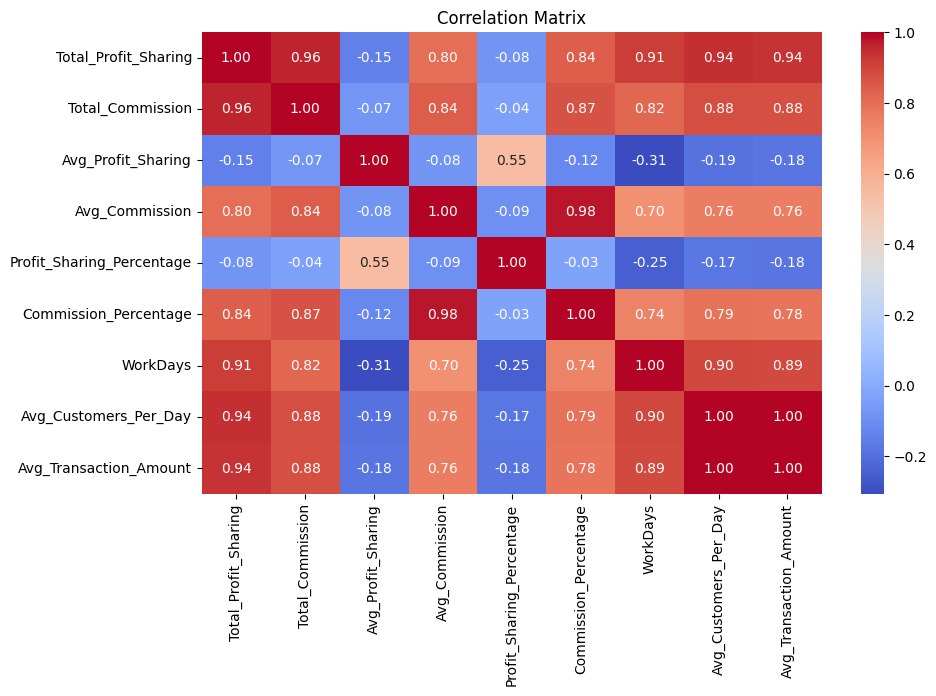

In [56]:
# Select only numeric columns for correlation analysis
numeric_columns = combined_data.select_dtypes(include=[np.number])
correlation = numeric_columns.corr()

print("\nCorrelation Matrix:")
print(correlation)

# Heatmap of correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Interpretation

1. **Strong Positive Correlations**:
   - **Total Profit Sharing** is strongly correlated with **Total Commission** (0.96), **WorkDays** (0.91), and **Avg Customers Per Day** (0.94). This suggests that barbers who work more days and serve more customers tend to have higher total profit sharing and commissions.
   - **Avg Customers Per Day** is almost perfectly correlated with **Avg Transaction Amount** (0.99), indicating that barbers serving more customers daily also generate higher average transaction values.

2. **Average Profit Sharing and Commission Dynamics**:
   - **Avg Profit Sharing** has a weak negative correlation with **Total Profit Sharing** (-0.15) and **Avg Customers Per Day** (-0.19). This may indicate that higher-performing barbers, measured by volume, may not necessarily have higher average profit sharing per service.
   - **Avg Commission**, however, shows a moderate positive correlation with **Total Profit Sharing** (0.80) and a strong correlation with **Commission Percentage** (0.98), suggesting commissions align more closely with overall performance metrics.

3. **Profit Sharing and Commission Percentages**:
   - **Profit Sharing Percentage** has weak or negligible correlations with most performance metrics, which could indicate inconsistency or room for optimization in the profit-sharing model.
   - **Commission Percentage** is positively correlated with **Avg Customers Per Day** (0.79) and **WorkDays** (0.74), indicating a more performance-driven structure compared to profit-sharing.

4. **Workdays and Performance Metrics**:
   - **WorkDays** correlates strongly with **Total Profit Sharing** (0.91) and moderately with **Avg Commission** (0.70), reinforcing that consistent attendance is a critical factor for high overall earnings.

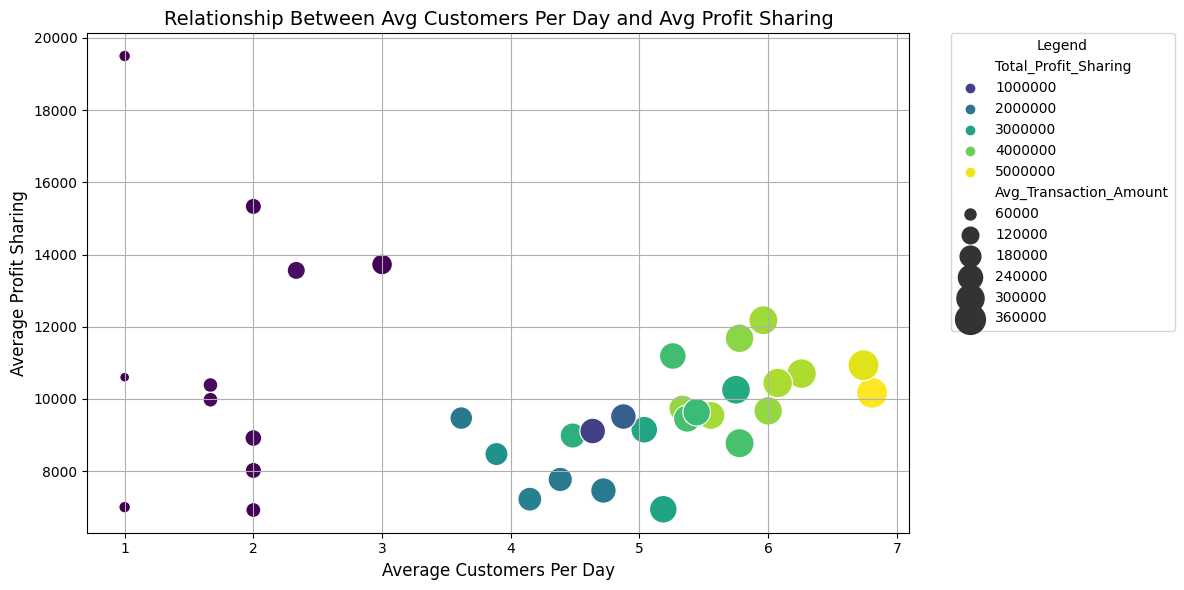

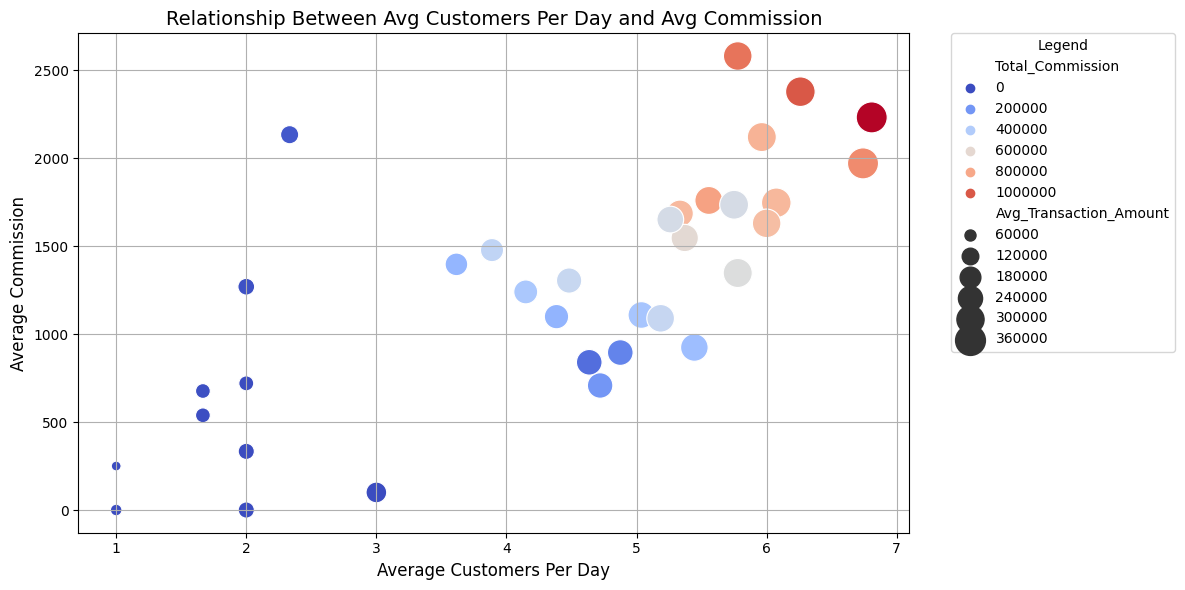

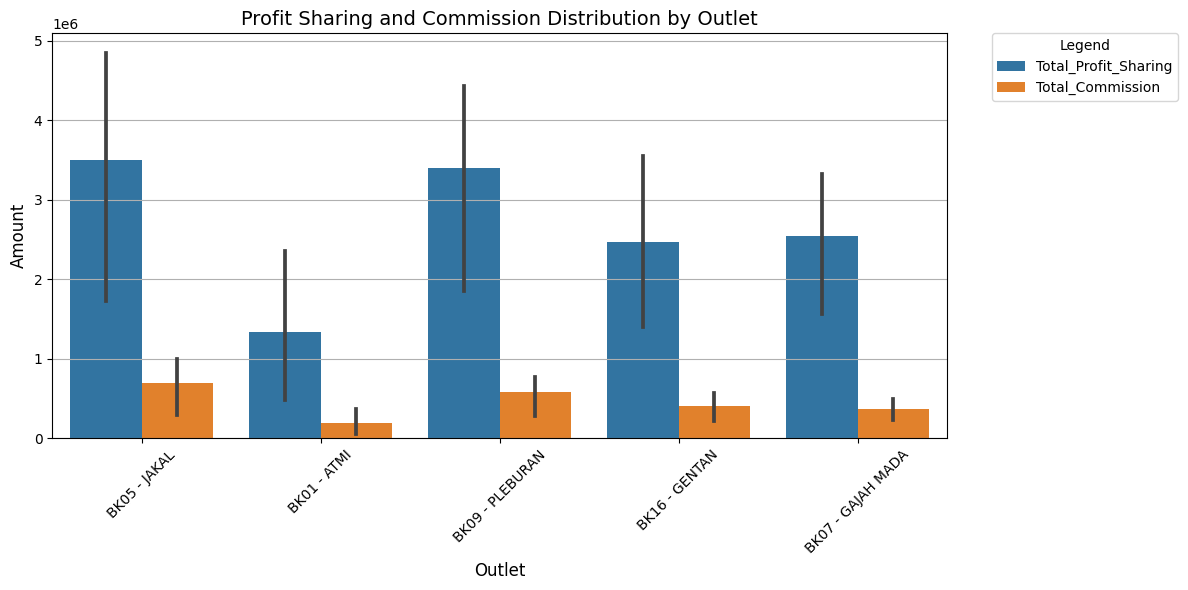

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot: Avg Customers Per Day vs Avg Profit Sharing
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=combined_data,
    x='Avg_Customers_Per_Day',
    y='Avg_Profit_Sharing',
    hue='Total_Profit_Sharing',
    size='Avg_Transaction_Amount',
    sizes=(50, 500),
    palette='viridis'
)
plt.title('Relationship Between Avg Customers Per Day and Avg Profit Sharing', fontsize=14)
plt.xlabel('Average Customers Per Day', fontsize=12)
plt.ylabel('Average Profit Sharing', fontsize=12)
plt.legend(
    title='Legend',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatterplot: Avg Customers Per Day vs Avg Commission
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=combined_data,
    x='Avg_Customers_Per_Day',
    y='Avg_Commission',
    hue='Total_Commission',
    size='Avg_Transaction_Amount',
    sizes=(50, 500),
    palette='coolwarm'
)
plt.title('Relationship Between Avg Customers Per Day and Avg Commission', fontsize=14)
plt.xlabel('Average Customers Per Day', fontsize=12)
plt.ylabel('Average Commission', fontsize=12)
plt.legend(
    title='Legend',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar Chart: Profit Sharing and Commission Distribution by Outlet
plt.figure(figsize=(12, 6))
sns.barplot(
    data=combined_data.melt(
        id_vars=['Outlet', 'Barber'],
        value_vars=['Total_Profit_Sharing', 'Total_Commission'],
        var_name='Income Type',
        value_name='Amount'
    ),
    x='Outlet',
    y='Amount',
    hue='Income Type'
)
plt.title('Profit Sharing and Commission Distribution by Outlet', fontsize=14)
plt.xlabel('Outlet', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=45)
plt.legend(
    title='Legend',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

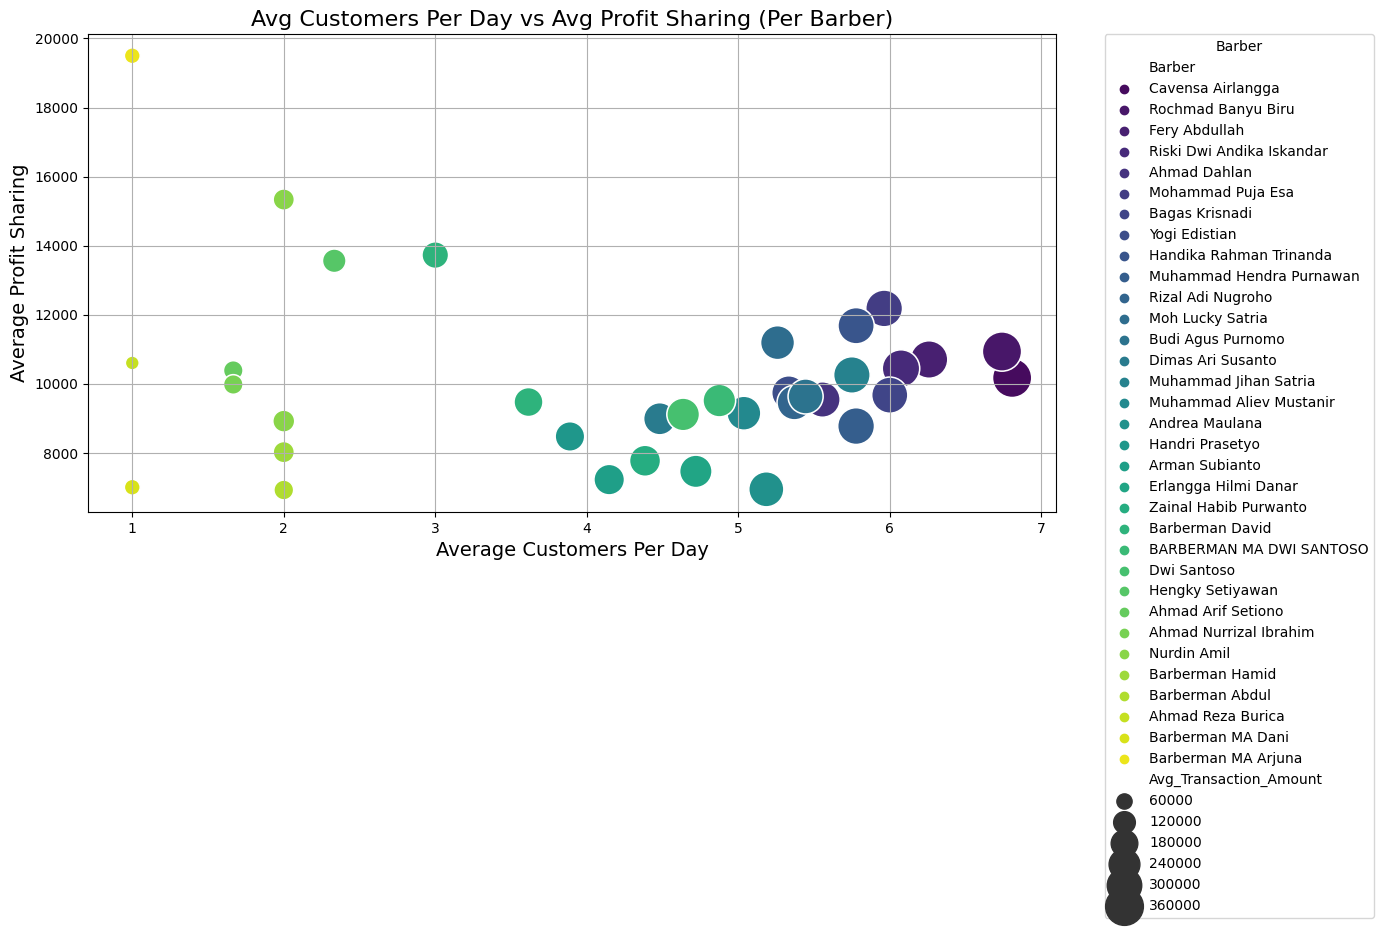

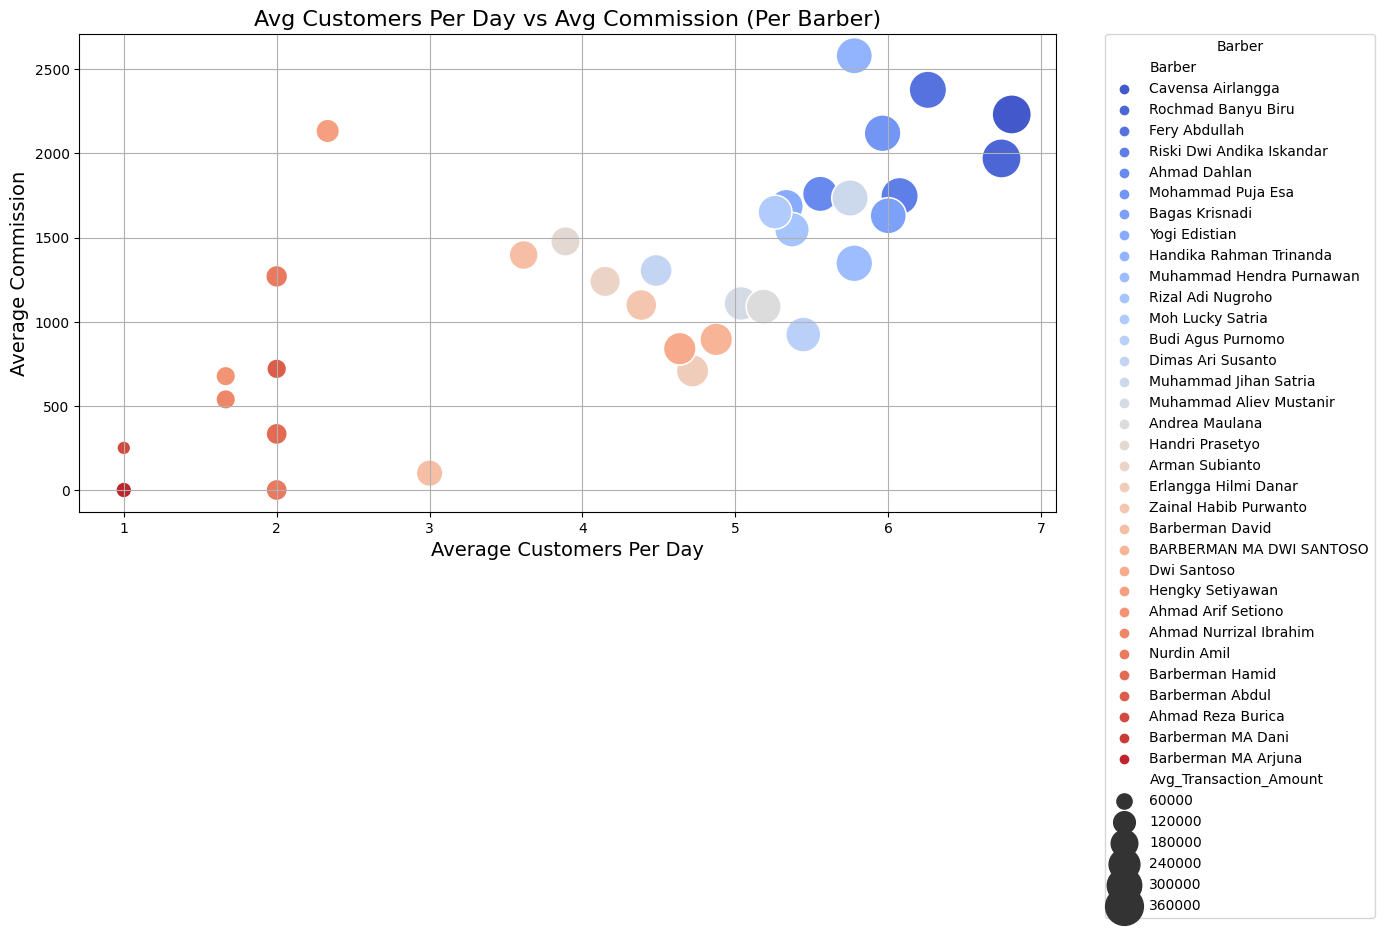

In [48]:
# Scatterplot: Avg Customers Per Day vs Avg Profit Sharing (Per Barber)
plt.figure(figsize=(14, 8)) 
sns.scatterplot(
    data=combined_data,
    x='Avg_Customers_Per_Day',
    y='Avg_Profit_Sharing',
    hue='Barber',
    size='Avg_Transaction_Amount',
    sizes=(100, 800), 
    palette='viridis'
)
plt.title('Avg Customers Per Day vs Avg Profit Sharing (Per Barber)', fontsize=16)
plt.xlabel('Average Customers Per Day', fontsize=14)
plt.ylabel('Average Profit Sharing', fontsize=14)
plt.legend(
    title='Barber',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=10
)
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatterplot: Avg Customers Per Day vs Avg Commission (Per Barber)
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=combined_data,
    x='Avg_Customers_Per_Day',
    y='Avg_Commission',
    hue='Barber',
    size='Avg_Transaction_Amount',
    sizes=(100, 800),
    palette='coolwarm'
)
plt.title('Avg Customers Per Day vs Avg Commission (Per Barber)', fontsize=16)
plt.xlabel('Average Customers Per Day', fontsize=14)
plt.ylabel('Average Commission', fontsize=14)
plt.legend(
    title='Barber',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=10
)
plt.grid(True)
plt.tight_layout()
plt.show()

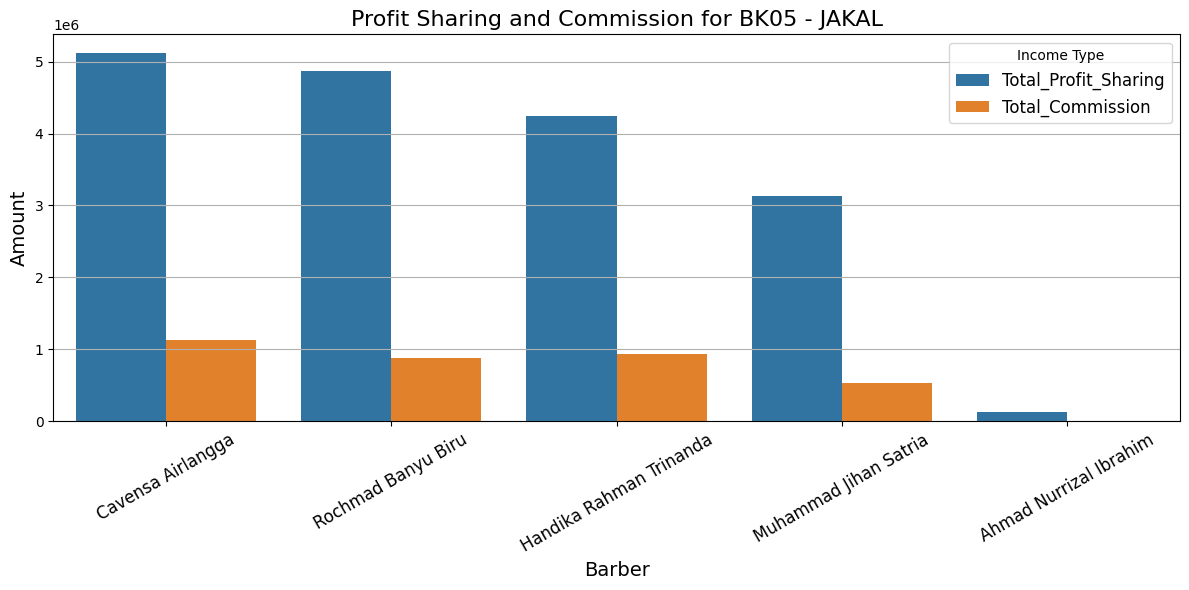

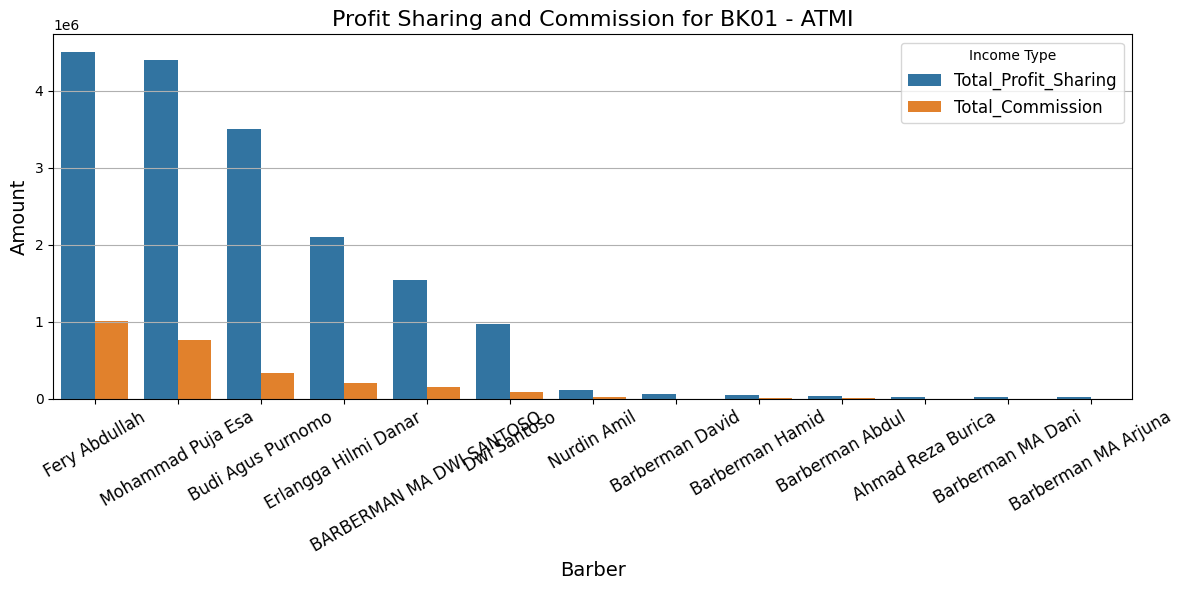

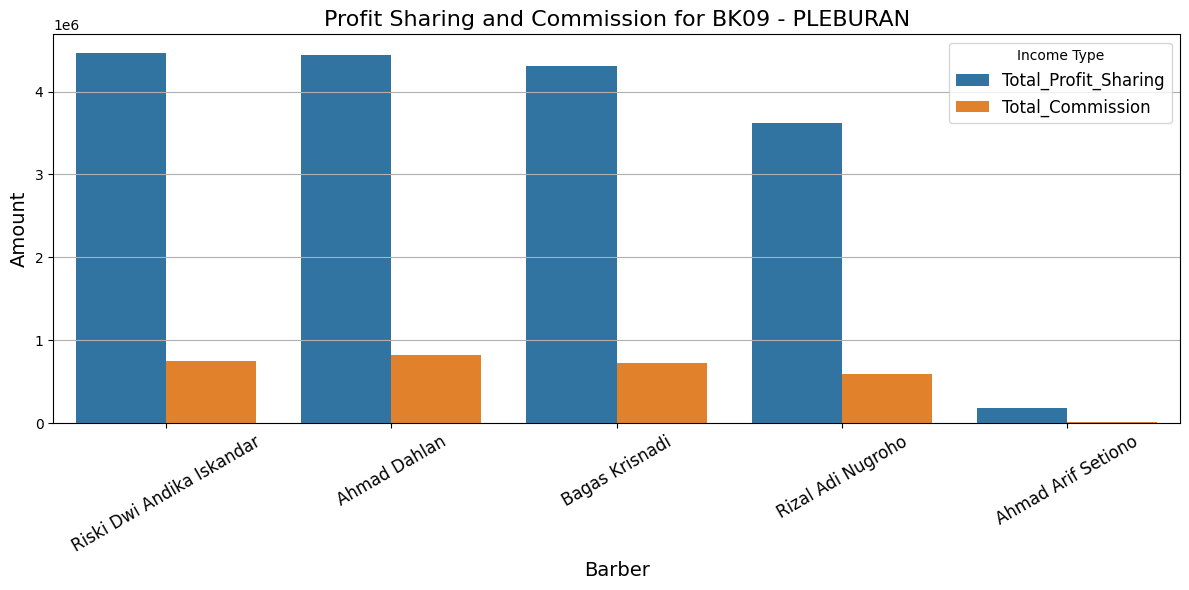

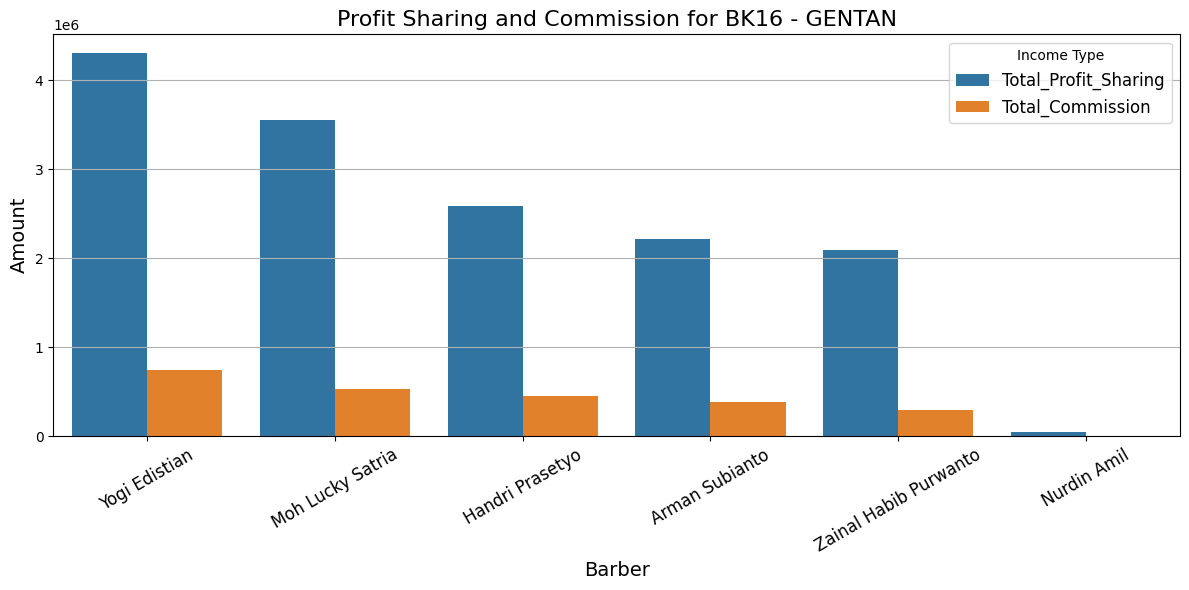

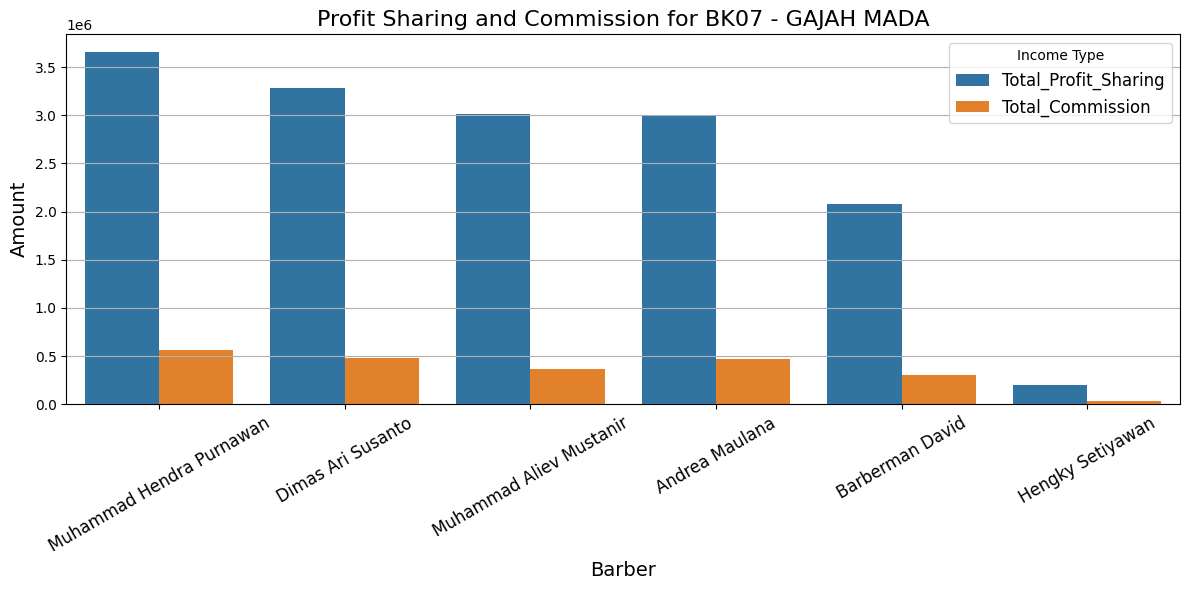

In [47]:
# Bar Chart: Profit Sharing and Commission Per Barber Per Uutlet
outlets = combined_data['Outlet'].unique()
for outlet in outlets:
    # Filter data per outlet
    outlet_data = combined_data[combined_data['Outlet'] == outlet]
    
    # Plot bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=outlet_data.melt(
            id_vars=['Barber'],
            value_vars=['Total_Profit_Sharing', 'Total_Commission'],
            var_name='Income Type',
            value_name='Amount'
        ),
        x='Barber',
        y='Amount',
        hue='Income Type'
    )
    plt.title(f'Profit Sharing and Commission for {outlet}', fontsize=16)
    plt.xlabel('Barber', fontsize=14)
    plt.ylabel('Amount', fontsize=14)
    plt.xticks(rotation=30, fontsize=12)  # Rotasi label untuk menghindari tumpang tindih
    plt.legend(
    title='Income Type',
    loc='upper right',
    fontsize=12
    )
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

## **Insights and Analysis**

### **Insights**

1. **Impact of Profit-Sharing Models and Commission Structures**:
   - **Average Profit Sharing Percentage**: 
     - The range varies between **~19% to 25%**, indicating different profit-sharing agreements across barbers. Higher percentages are associated with outlets like BK09 - PLEBURAN.
   - **Average Commission Percentage**:
     - Consistently around **~4.2% to 5.4%**, highlighting a stable structure regardless of outlets.
   - Barbers with higher profit-sharing percentages generally have higher total profit-sharing income, correlating positively with their performance metrics.

2. **High-Performing Barbers**:
   - **Top 3 Barbers by Total Profit Sharing**:
     - Cavensa Airlangga (BK05 - JAKAL): IDR 5,124,600
     - Rochmad Banyu Biru (BK05 - JAKAL): IDR 4,875,663
     - Fery Abdullah (BK01 - ATMI): IDR 4,504,764
   - These barbers also have high average transaction amounts and customers per day:
     - Cavensa Airlangga: **6.81 customers/day**, IDR **389,038/transaction**
     - Rochmad Banyu Biru: **6.74 customers/day**, IDR **389,074/transaction**

3. **Outlets with High-Performing Barbers**:
   - **Outlet BK05 - JAKAL** has the highest-performing barbers:
     - Cavensa Airlangga and Rochmad Banyu Biru.
     - Average transaction amounts are the highest among outlets at **~IDR 389,000**.
   - **Outlets BK09 - PLEBURAN**:
     - Ahmad Dahlan and Riski Dwi Andika Iskandar also show steady performance, with Avg. Profit Sharing Percentage **~25%**.

4. **Outlets with Moderate or Low Performance**:
   - **Outlets with Average Transaction Amount Below IDR 200,000**:
     - These outlets may face lower customer traffic or focus on services with lower margins, such as discounted packages or basic offerings.
     - Barbers in these outlets, such as those in BK16 - GENTAN or BK07 - GAJAH MADA, often have fewer daily customers or lower transaction values.
   - **Key Observations**:
     - Profit-sharing percentages for these outlets are inconsistent and tend to be lower than high-performing outlets.
     - Commission percentages remain stable but may not be sufficient to drive significant improvement in performance.


### **Key Relationships**
- **Profit Sharing vs. Barber Performance**:
  - Barbers with higher profit-sharing percentages demonstrate better performance metrics, including average customers per day and transaction values.
- **Commission Structure Impact**:
  - While commission percentages remain relatively stable across barbers, higher total commission correlates with higher total profit-sharing income.
- **Lower Performance Factors**:
  - Barbers in underperforming outlets may lack sufficient incentives, operational resources, or customer engagement strategies to achieve high performance.


## **Recommendations**

1. **Optimize Profit-Sharing Models**:
   - Standardize profit-sharing percentages closer to **25%** across all outlets to incentivize barbers and enhance performance consistency.
   - Introduce **performance-based adjustments** for barbers in low-performing outlets to encourage growth and improve engagement.

2. **Enhance Performance Incentives**:
   - Provide additional incentives tied to average customers per day or transaction amounts to motivate barbers.
   - Use a tiered commission structure to reward higher transaction values and encourage competitive performance.
   - Consider offering **seasonal bonuses** or **milestone rewards** to barbers in moderate or low-performing outlets.

3. **Focus on High-Performing Outlets**:
   - **BK05 - JAKAL**: Leverage its performance benchmarks to set standards for other outlets.
   - Share best practices from top-performing barbers (e.g., customer handling, service quality) with other barbers and outlets.

4. **Develop Underperforming Outlets**:
   - Conduct detailed operational audits of underperforming outlets to identify bottlenecks such as insufficient staffing, service quality gaps, or lack of marketing efforts.
   - Introduce localized promotional campaigns targeting these outlets to drive customer traffic.
   - Invest in training programs to enhance barber skills, particularly in customer service and upselling techniques.

5. **Monitor and Adjust**:
   - Regularly analyze barber performance data to identify trends and anomalies.
   - Implement dynamic adjustments to profit-sharing and commission percentages based on real-time performance data.